In [42]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [43]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [44]:
def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

In [45]:
def forward(x,w1,w2,predict=False):
    a1 = np.matmul(x,w1)
    z1 = sigmoid(a1)
    bias = np.ones((len(z1),1))
    z1 = np.concatenate((bias,z1),axis=1)
    a2 = np.matmul(z1,w2)
    z2 = sigmoid(a2)
    if predict:
        return z2
    return a1, z1, a2, z2

In [46]:
def backdrop(a2,z0,z1,z2,y):
    delta2 = z2-y
    Delta2 = np.matmul(z1.T,delta2)
    delta1 = (delta2.dot(w2[1:,:].T))*sigmoid_deriv(a1)
    Delta1 = np.matmul(z0.T,delta1)
    return delta2,Delta1,Delta2

In [47]:
X = np.array([[1,1,0],
              [1,0,1,],
              [1,0,0],
              [1,1,1]])

In [48]:
y = np.array([[1],[1],[0],[0]])

In [49]:
w1 = np.random.randn(3,5)
w2 = np.random.randn(6,1)


In [50]:
lr = 0.09
epochs = 15000
costs = []
m = len(X)

In [51]:
for i in range(epochs):
    a1,z1,a2,z2 = forward(X,w1,w2)
    
    delta2,Delta1,Delta2 = backdrop(a2, X, z1, z2,y)
    w1 -= lr*(1/m)*Delta1
    w2 -= lr*(1/m)*Delta2
    c = np.mean(np.abs(delta2))
    costs.append(c)
    if i % 1000 == 0:
        print(f"iteration: {i}. Error: {c}")
        

iteration: 0. Error: 0.5160544685145152
iteration: 1000. Error: 0.47238931971059683
iteration: 2000. Error: 0.3706501773274736
iteration: 3000. Error: 0.1611504132353007
iteration: 4000. Error: 0.06927501890454593
iteration: 5000. Error: 0.0405075693254264
iteration: 6000. Error: 0.02792091719455736
iteration: 7000. Error: 0.021083924686099674
iteration: 8000. Error: 0.01684795076653741
iteration: 9000. Error: 0.013986549402704421
iteration: 10000. Error: 0.011932809991443253
iteration: 11000. Error: 0.01039130722550271
iteration: 12000. Error: 0.009193908211999575
iteration: 13000. Error: 0.008238256802056608
iteration: 14000. Error: 0.007458641188616789


In [40]:
print("tarining completed")

tarining completed


Percentages: 
[[0.99456713]
 [0.99034777]
 [0.00267381]
 [0.0101469 ]]
Prediction: 
[[1.]
 [1.]
 [0.]
 [0.]]


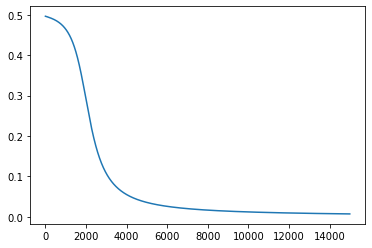

In [41]:
z3 = forward(X,w1,w2,True)
print("Percentages: ")
print(z3)
print("Prediction: ")
print(np.round(z3))

plt.plot(costs)
plt.show()